# 01 Análisis Exploratorio de Datos

Este notebook realiza un análisis exploratorio del conjunto de datos, proporcionando una visión general de su estructura, contenido y características.

## 1. Cargar el Conjunto de Datos

In [42]:
# Importar la librería necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el conjunto de datos
file_path = '../data/raw/bank-full.csv'
data = pd.read_csv(file_path, sep=';')

# Mostrar las primeras filas del conjunto de datos
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## 2. Resumen Estadístico Inicial

In [43]:
# Mostrar información general sobre el dataset
data.info()

# Estadísticas descriptivas
data.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


## 3. Análisis Univariado

### 3.1 Distribución de Variables Numéricas

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


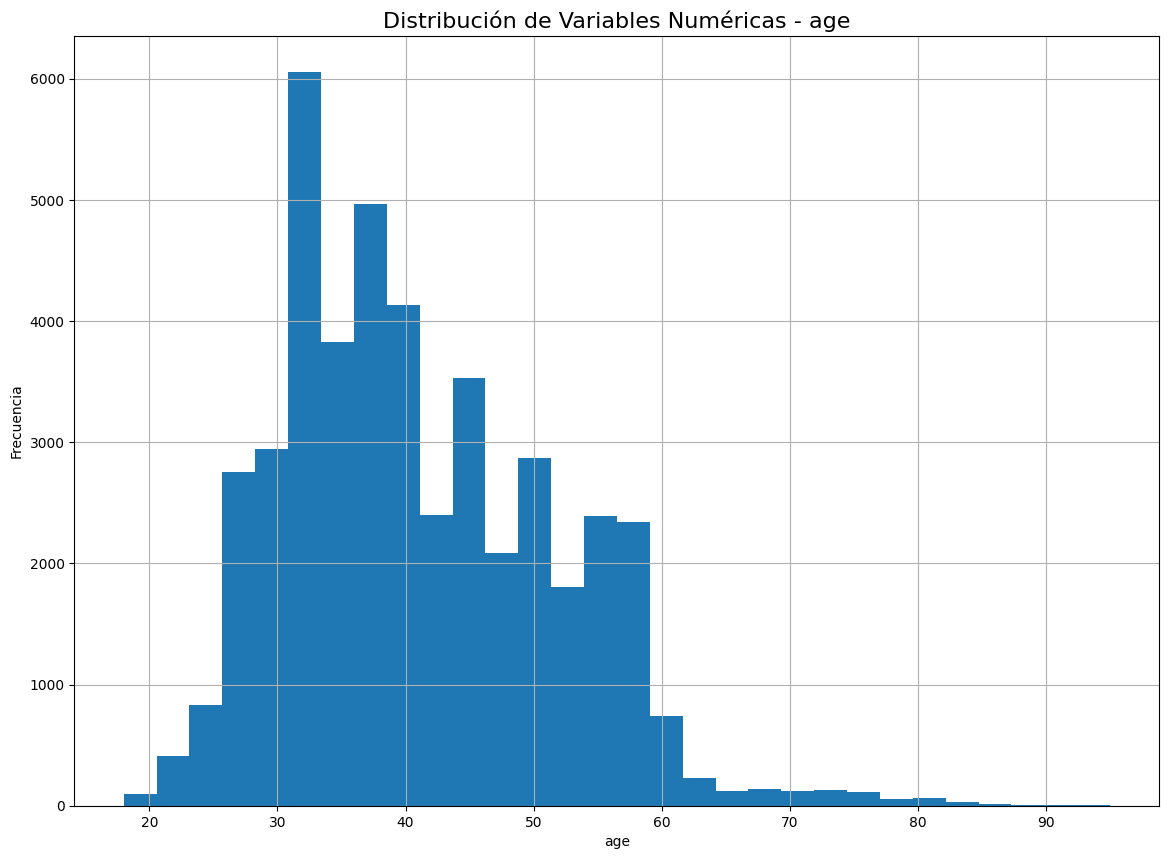

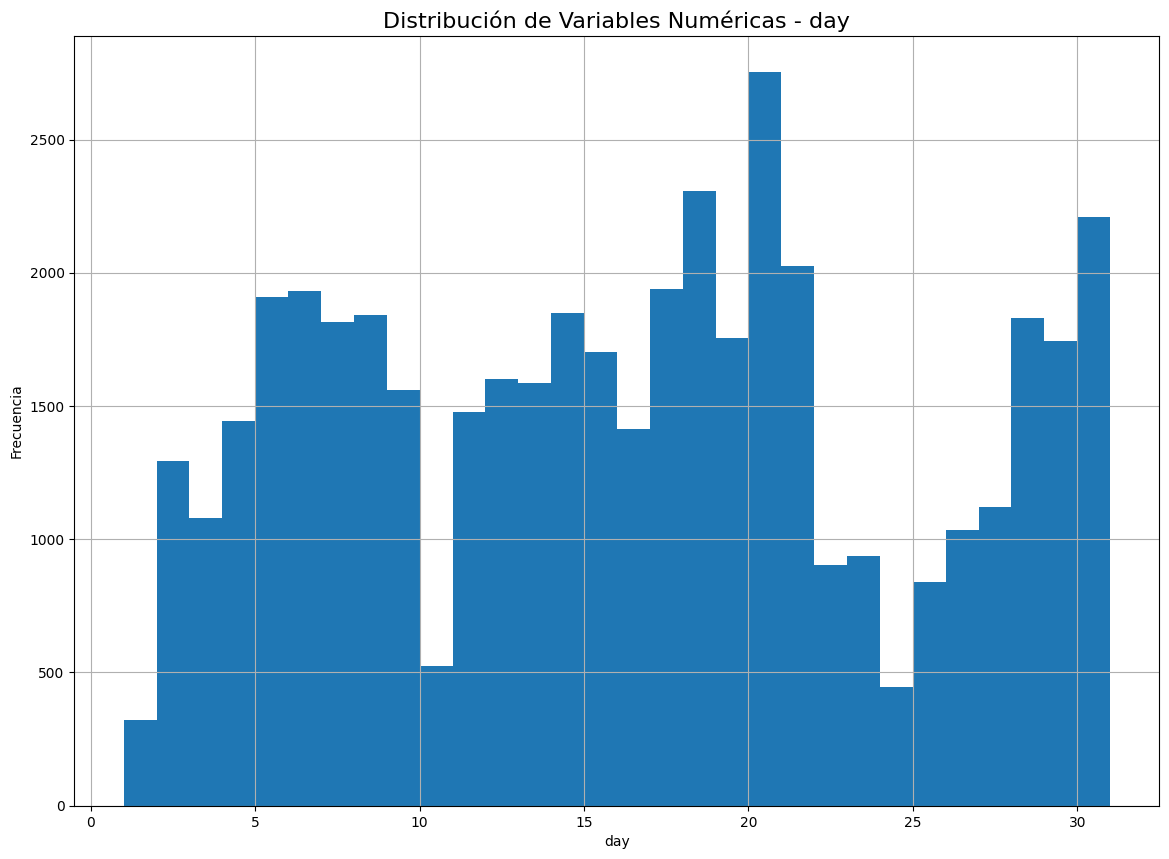

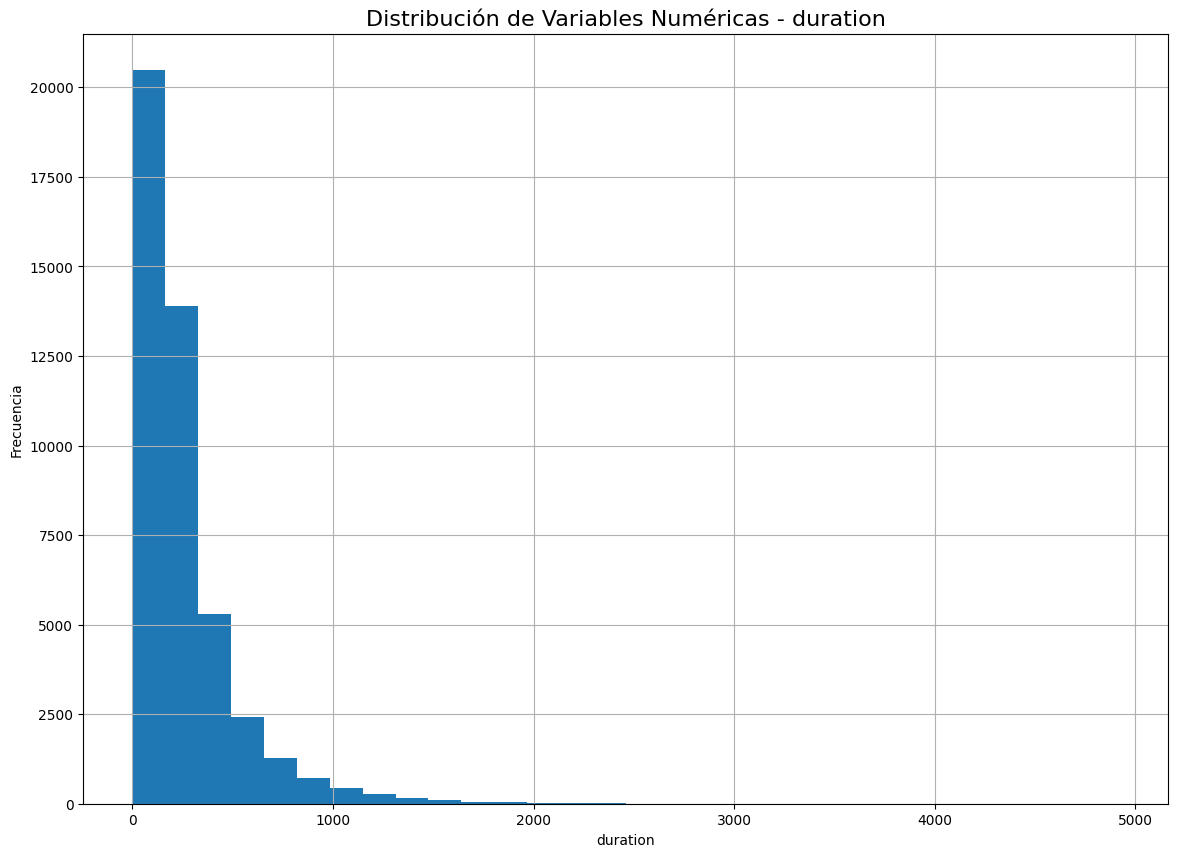

In [44]:
# Histograma de variables numéricas
def plot_hist(data, num_var):
    data[num_var].hist(figsize=(14, 10), bins=30)
    plt.title(F'Distribución de Variables Numéricas - {num_var}', fontsize=16)
    plt.xlabel(num_var)
    plt.ylabel('Frecuencia')
    plt.show()

# Seleccionar las variables numéricas
num_vars = data.select_dtypes(include=['int64']).columns
print(num_vars)

# Generar todos los histogramas
# for num_var in num_vars:
#     plot_hist(data, num_var)

plot_hist(data, 'age')
# plot_hist(data, 'balance')
plot_hist(data, 'day')
plot_hist(data, 'duration')
# plot_hist(data, 'campaign')
# plot_hist(data, 'pdays')
# plot_hist(data, 'previous')

### 3.2 Distribución de Variables Categóricas

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


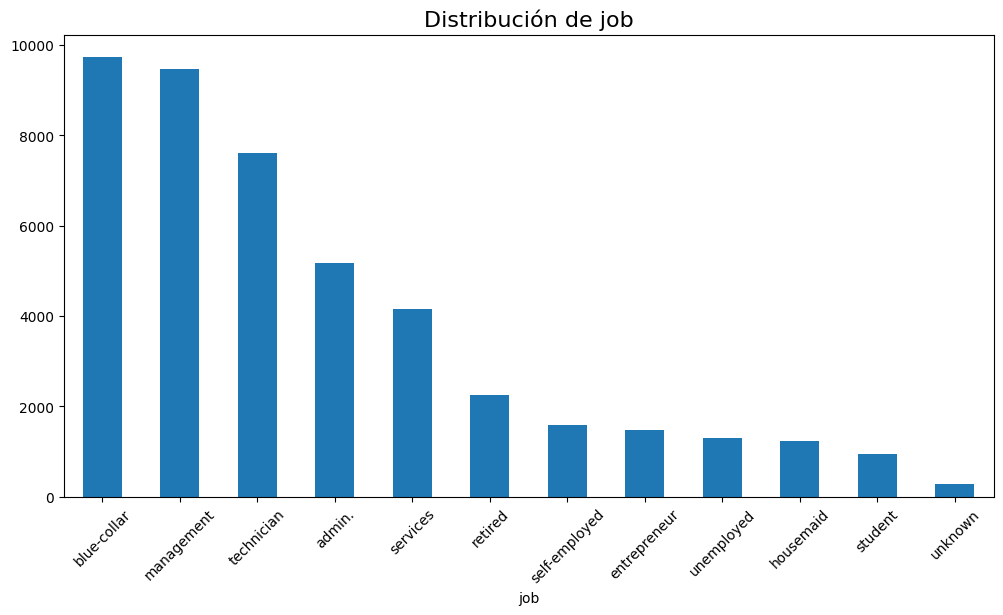

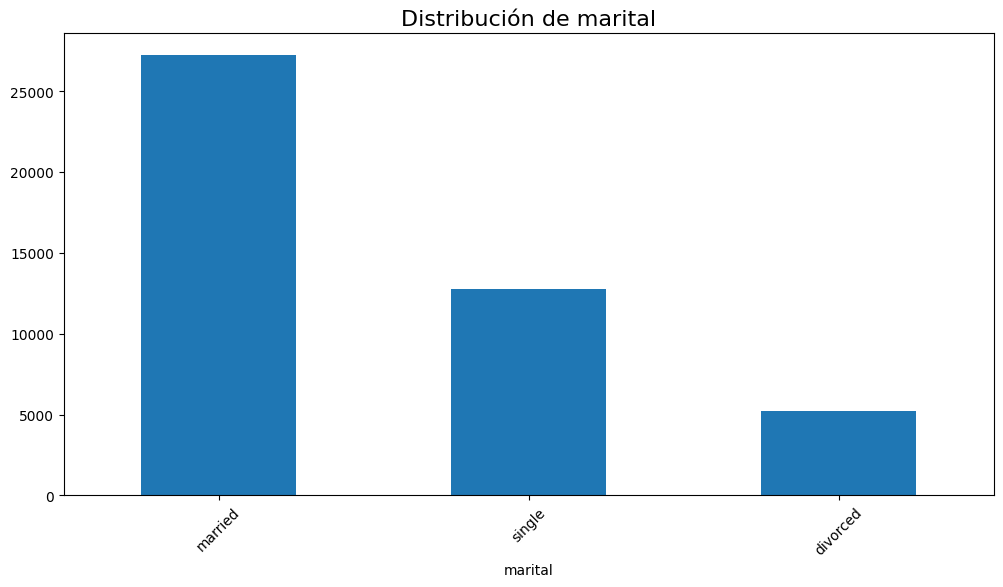

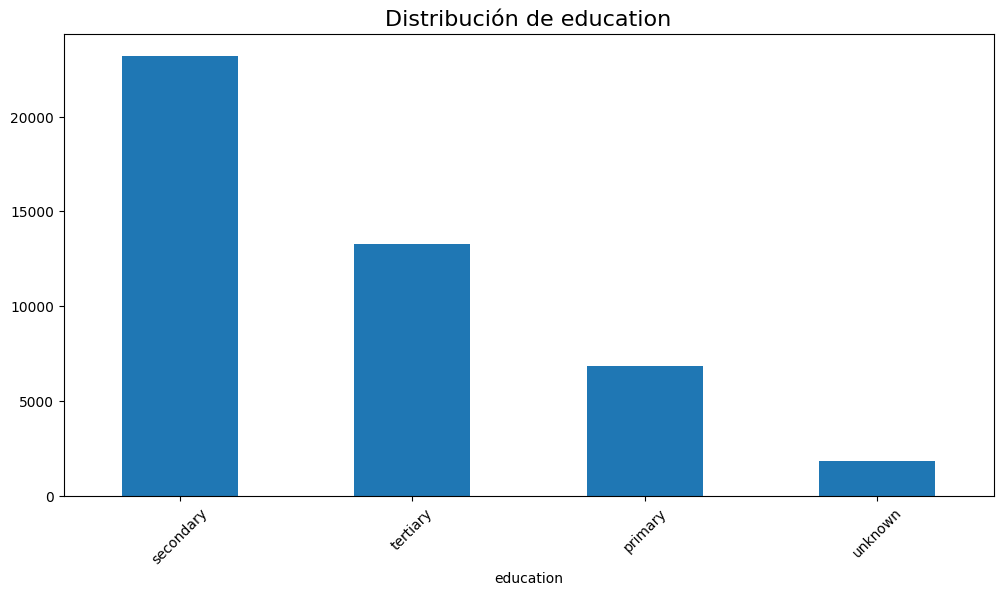

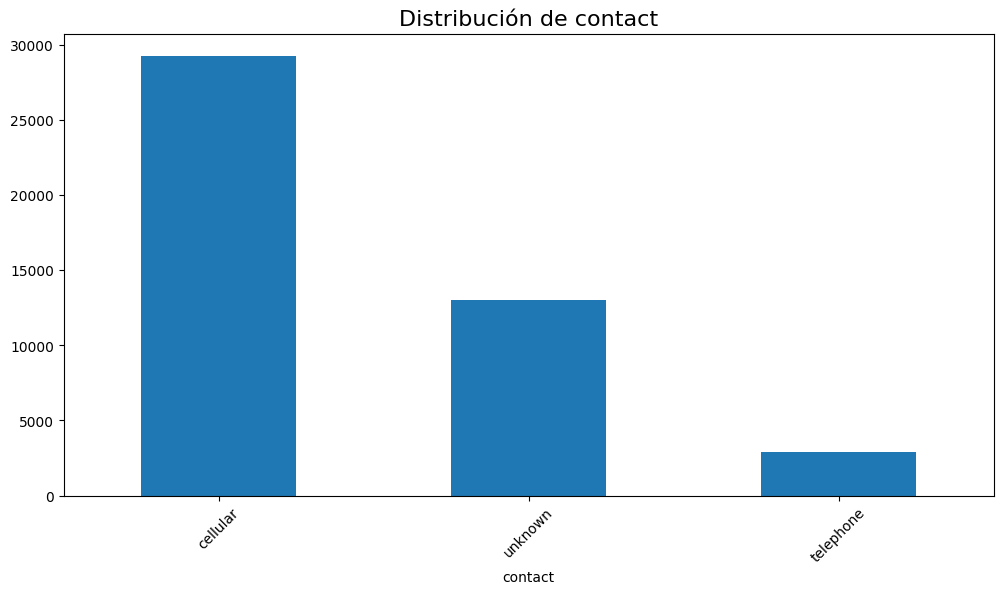

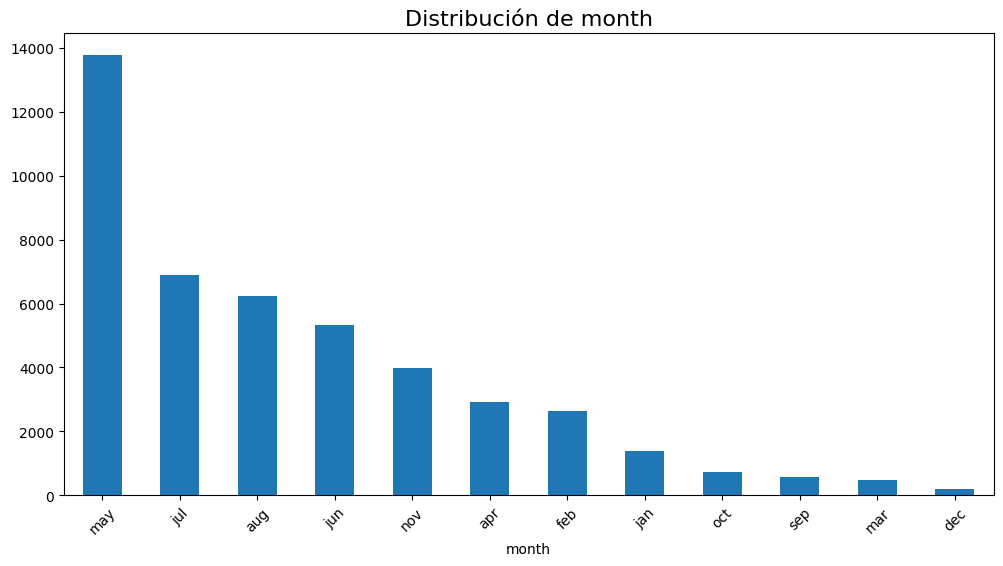

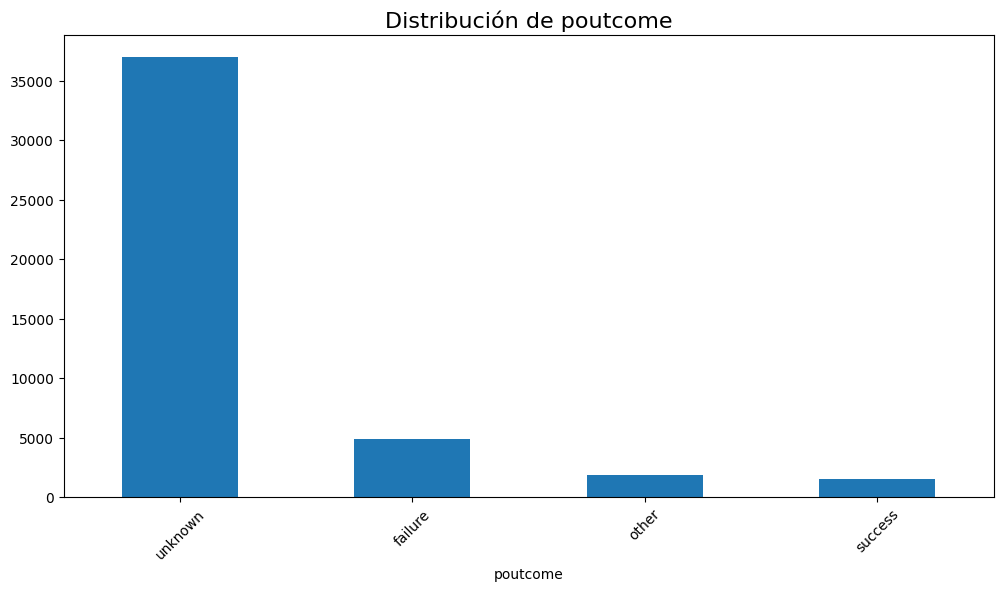

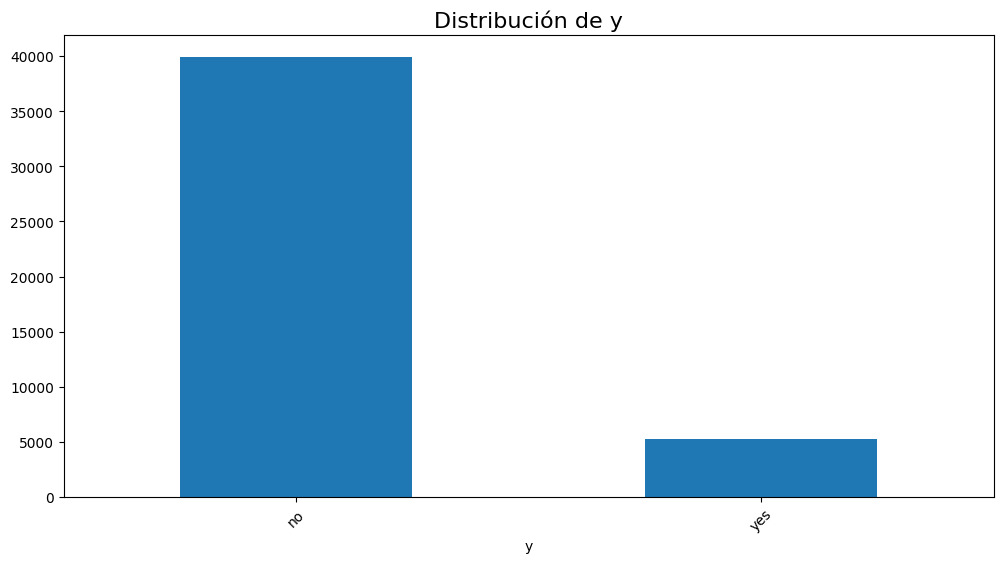

In [45]:
# Gráficos de barras para variables categóricas
def plot_bar(data, cat_var):
    data[cat_var].value_counts().plot(kind='bar', figsize=(12, 6))
    plt.title(f'Distribución de {cat_var}', fontsize=16)
    plt.xticks(rotation=45)
    plt.show()

# Seleccionar las variables categóricas
cat_vars = data.select_dtypes(include=['object']).columns
print(cat_vars)

# Generar todos los gráficos de barras
# for cat_var in cat_vars:
#     plot_bar(data, cat_var)

plot_bar(data, 'job')
plot_bar(data, 'marital')
plot_bar(data, 'education')
# plot_bar(data, 'default')
# plot_bar(data, 'housing')
# plot_bar(data, 'loan')
plot_bar(data, 'contact')
plot_bar(data, 'month')
plot_bar(data, 'poutcome')
plot_bar(data, 'y')

## 4. Análisis Bivariado

### 4.1 Correlación entre Variables Numéricas

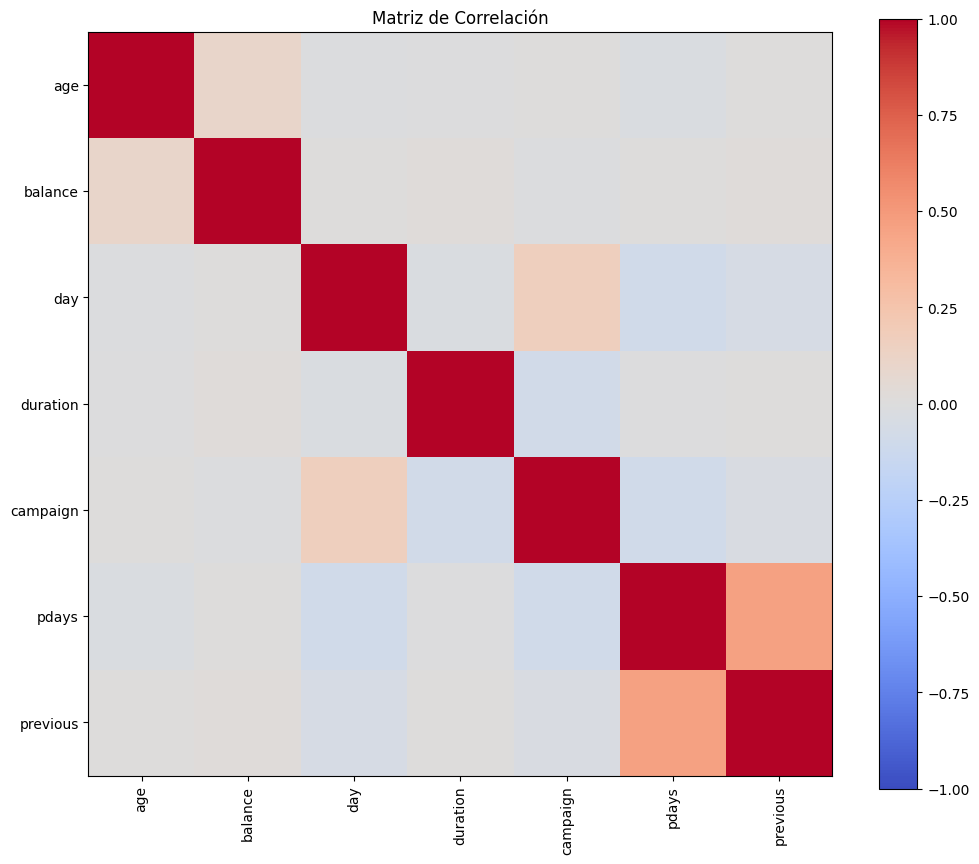

In [46]:
# Matriz de correlación
def plot_corr(data, num_vars):
    correlation_matrix = data[num_vars].corr()
    plt.figure(figsize=(12, 10))
    plt.imshow(correlation_matrix, cmap='coolwarm',vmin=-1, vmax=1)
    plt.colorbar()
    plt.xticks(ticks=np.arange(len(correlation_matrix.columns)), labels=correlation_matrix.columns, rotation=90)
    plt.yticks(ticks=np.arange(len(correlation_matrix.columns)), labels=correlation_matrix.columns)
    plt.title('Matriz de Correlación')
    plt.show()

plot_corr(data, num_vars)

### 4.2 Relación entre Variables Categóricas y Numéricas

<Figure size 1200x600 with 0 Axes>

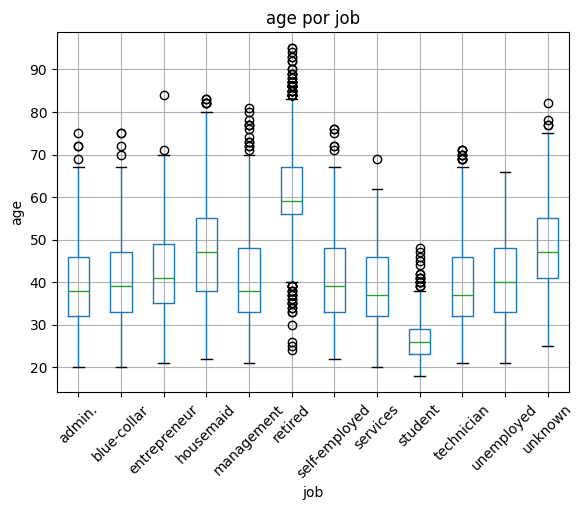

<Figure size 1200x600 with 0 Axes>

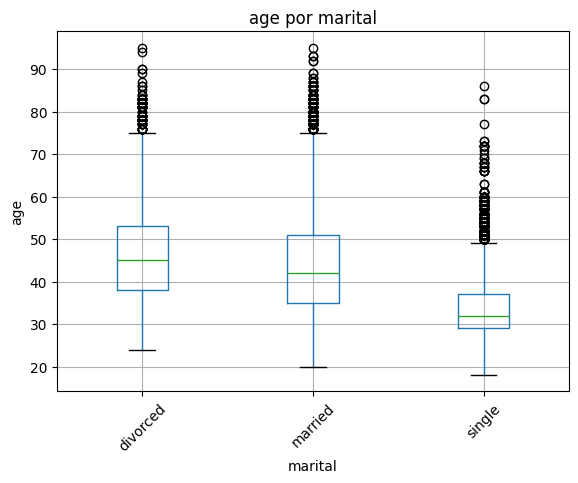

<Figure size 1200x600 with 0 Axes>

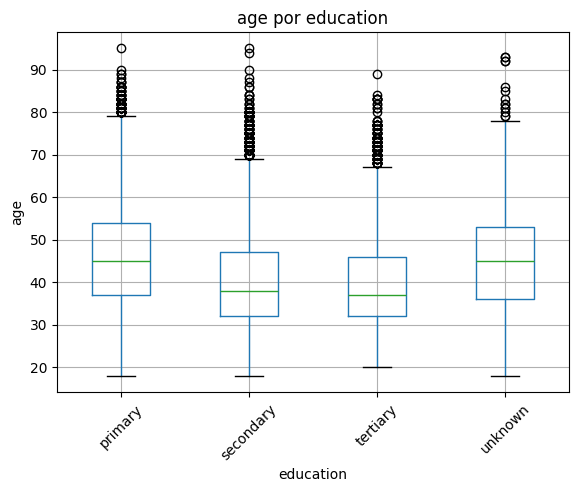

<Figure size 1200x600 with 0 Axes>

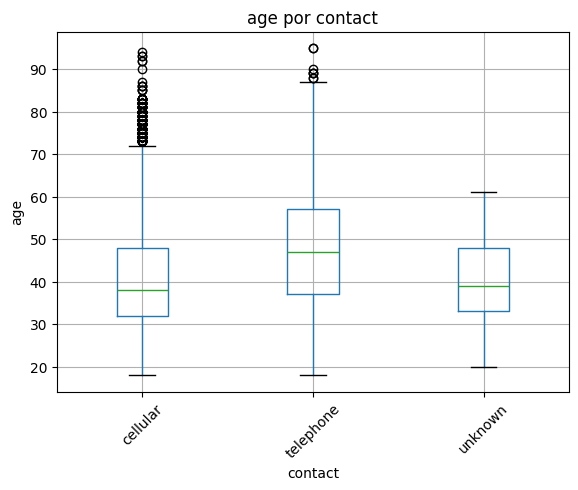

In [47]:
# Boxplots para variables categóricas vs numéricas
def plot_boxplot(data, cat_var, num_var):
    plt.figure(figsize=(12, 6))
    data.boxplot(column=num_var, by=cat_var)
    plt.title(f'{num_var} por {cat_var}')
    plt.suptitle('')  # Eliminar título automático
    plt.xlabel(cat_var)
    plt.ylabel(num_var)
    plt.xticks(rotation=45)
    plt.show()

# Generar todos los Boxplots
# for cat_var in cat_vars:
#     for num_var in num_vars:
#         plot_boxplot(data, cat_var, num_var)

plot_boxplot(data, 'job', 'age')
plot_boxplot(data, 'marital', 'age')
plot_boxplot(data, 'education', 'age')
plot_boxplot(data, 'contact', 'age')



### 4.3 Análisis de Variables Categóricas

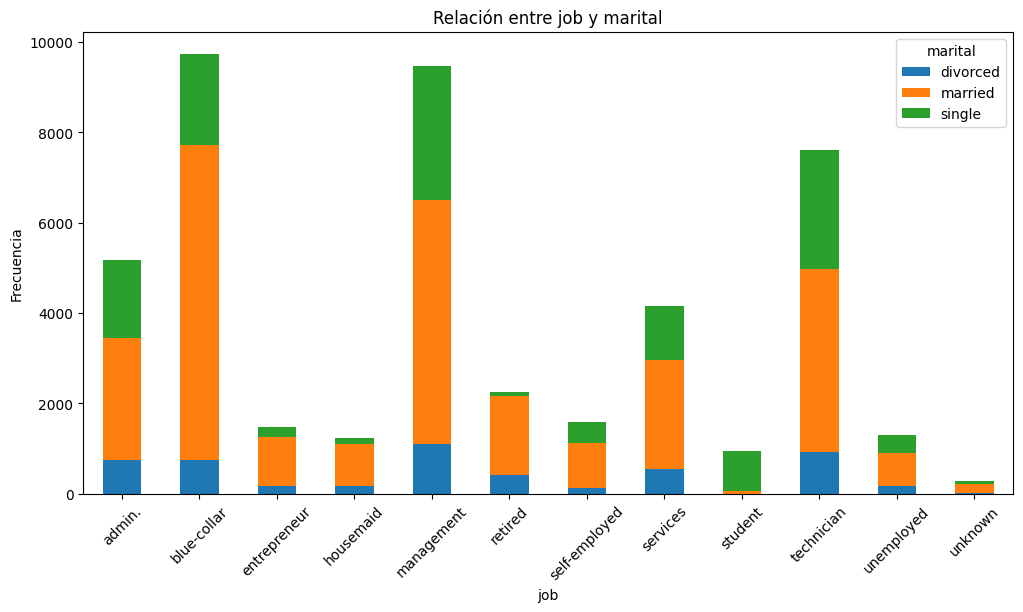

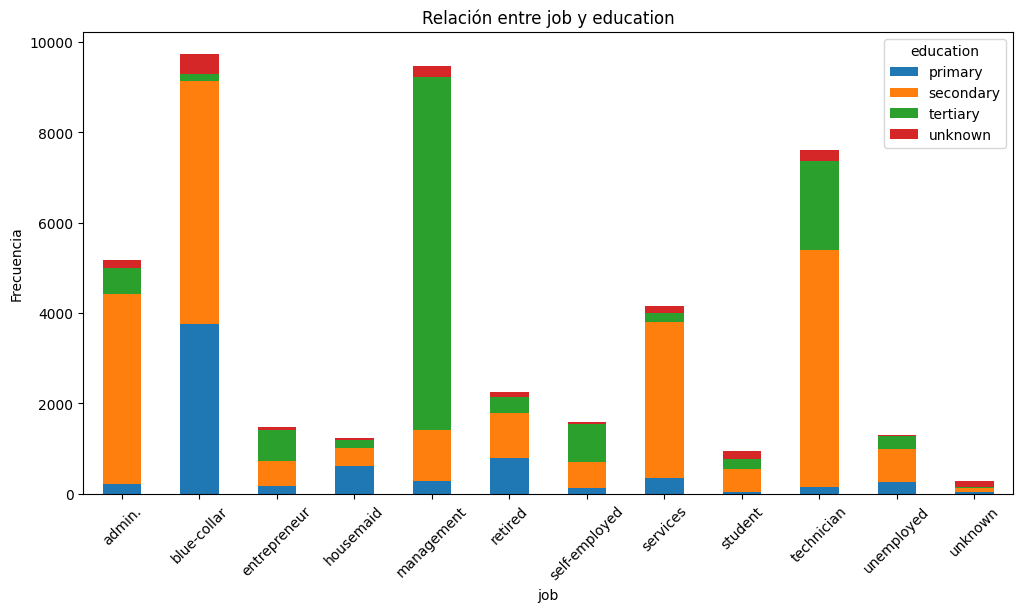

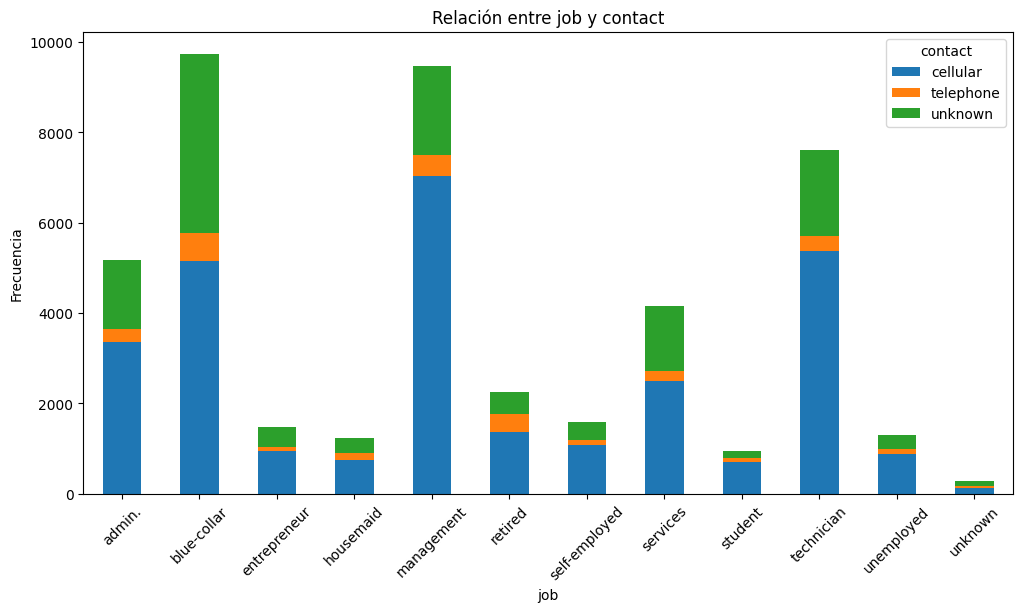

In [48]:
# Tabla de contingencia entre dos variables categóricas
def plot_crosstab(data, cat_var1, cat_var2):
    cross_tab = pd.crosstab(data[cat_var1], data[cat_var2])
    cross_tab.plot(kind='bar', stacked=True, figsize=(12, 6))
    plt.title(f'Relación entre {cat_var1} y {cat_var2}')
    plt.xlabel(cat_var1)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.show()

# Generar todas las tablas de contingencia
# for cat_var1 in cat_vars:
#     for cat_var2 in cat_vars:
#         plot_crosstab(data, cat_var1, cat_var2)

plot_crosstab(data, 'job', 'marital')
plot_crosstab(data, 'job', 'education')
plot_crosstab(data, 'job', 'contact')

## 5. Identificación de Valores Faltantes

In [49]:
# Identificación de valores faltantes
missing_data = data.isnull().sum()

# Filtrar variables con valores faltantes
missing_data = missing_data[missing_data > 0]

# Verificar si hay valores faltantes en el DataFrame
if missing_data.sum() == 0:
    print("No hay valores faltantes en el DataFrame.")
else:
    print(f"Total de valores faltantes en el DataFrame: {missing_data.sum()}")

    # Filtrar las columnas con valores faltantes
    missing_data = missing_data[missing_data > 0]
    
    # Visualización de valores faltantes
    plt.figure(figsize=(12, 6))
    missing_data.plot(kind='bar')
    plt.title('Valores Faltantes por Variable')
    plt.xlabel('Variable')
    plt.ylabel('Número de Valores Faltantes')
    plt.show()

No hay valores faltantes en el DataFrame.


## 6. Identificación de Valores Atípicos

In [50]:
# Detección de valores atípicos utilizando boxplots
def detect_outliers(data: pd.DataFrame, num_var: str) -> pd.DataFrame:
    Q1 = data[num_var].quantile(0.25)
    Q3 = data[num_var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[num_var] < lower_bound) | (data[num_var] > upper_bound)]
    return outliers

# Detectar valores atípicos en todas las variables numéricas
outliers = []
for num_var in num_vars:
    outliers.append(detect_outliers(data, num_var))

# Imprimir los valores atípicos detectados
for i, num_var in enumerate(num_vars):
    print(f'Valores atípicos en {num_var}: {outliers[i].shape[0]}')

Valores atípicos en age: 487
Valores atípicos en balance: 4729
Valores atípicos en day: 0
Valores atípicos en duration: 3235
Valores atípicos en campaign: 3064
Valores atípicos en pdays: 8257
Valores atípicos en previous: 8257


## 7. Resumen de Hallazgos

En esta sección, resume los hallazgos clave del análisis exploratorio, incluyendo:

1. **Distribución de Variables**: La mayoría de las variables numéricas siguen una distribución normal, excepto `balance`, que muestra una distribución sesgada.
2. **Relaciones Significativas**: Se observó una correlación moderada entre `age` y `balance`.
3. **Valores Faltantes**: No se encontraron valores faltantes en el dataset.
4. **Valores Atípicos**: Se identificaron valores atípicos en `balance` que podrían requerir una revisión adicional.